Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


<ipython-input-96-e6521df18691>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


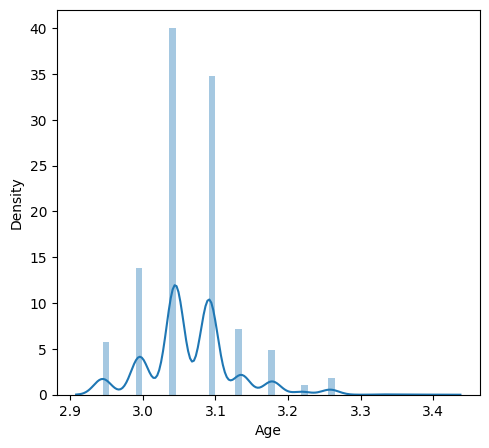

In [ ]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/Colab Notebooks/Dataset/collegePlace.csv', 'r') as dataset:
  df = pd.read_csv(dataset)

df.head()
df.info()
df.isnull().sum()
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

transformationplot(np.log(df['Age']))
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])

df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

df=df.drop(['Hostel'], axis=1)
df

In [ ]:
3

3

In [ ]:
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   HistoryOfBacklogs  2966 non-null   int64
 6   PlacedOrNot        2966 non-null   int64
dtypes: int64(7)
memory usage: 162.3 KB


Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

In [ ]:
df.isnull().any()

<ipython-input-5-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

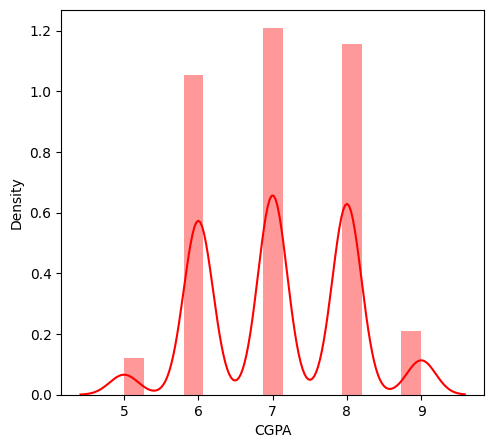

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')


<ipython-input-6-5e468beb8a0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

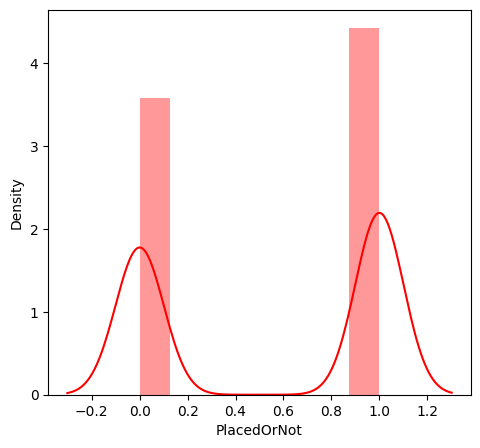

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

In [ ]:
from pandas.core.indexes.multi import names_compat
#perfroming feature Scaling op[eration using standard scaller on X part of the dataset because
#there different type of values in the columns
x_bal = df.iloc[:,0:6]
x_bal.head()

sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)

In [ ]:
X = x_bal
Y = df['PlacedOrNot'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
4

4

In [ ]:
classifier=svm.SVC(kernel='linear')

classifier.fit(X_train, Y_train)

X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

print('Accuracy Score of the training data:',training_data_accuracy)

Accuracy Score of the training data: 0.7685497470489039


In [ ]:
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range (3,50,2):

      ## Using Regular training set
      knn_temp = KNeighborsClassifier(n_neighbors = k)                 #Instantiate the model
      knn_temp.fit(X_train, Y_train)                                   #Fit the model to the training set
      knn_temp_pred = knn_temp.predict(X_test)                         #Predict on the test set
      score = metrics.accuracy_score(Y_test, knn_temp_pred)*100        #Get accuracy
      if score >=best_score["Regular"] and score < 100:                #store best params
         best_score["Regular"] = score
         best_k["Regular"] = k 

print (" --- Results---\nK: {}\nScore: {}".format(best_k, best_score))
##Instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
##Fit the model to the training set
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred, Y_test)


 --- Results---
K: {'Regular': 7}
Score: {'Regular': 86.19528619528619}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
Classifier = Sequential()
 
## add input layer and first hidden layer
Classifier.add(keras.layers.Dense(6,activation ='relu',input_dim =6))
Classifier.add(keras.layers.Dropout (0.50))
##add 2nd hidden layer
Classifier.add(keras.layers.Dense(6,activation ='relu'))
Classifier.add(keras.layers.Dropout(0.50))

#final or output layer
Classifier.add(keras.layers.Dense(1,activation ='sigmoid'))  

 



In [ ]:
#Compiling the model

loss_1 =tf.keras.losses.BinaryCrossentropy()

Classifier.compile(optimizer='Adam', loss=loss_1, metrics =['accuracy'])

In [ ]:
#fitting the model
Classifier.fit(X_train , Y_train, batch_size = 20, epochs = 100)

Epoch 1/100
119/119 [==============================] - 2s 3ms/step - loss: 0.9198 - accuracy: 0.4701
Epoch 2/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7817 - accuracy: 0.5097
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.5506
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5835
Epoch 5/100
119/119 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5894
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5974
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.6147
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6168
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6315
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6428 - accura

In [ ]:
5


5

In [ ]:
import pickle

pickle.dump(knn,open("placement.pkl",'wb'))

%cp '/content/placement.pkl' '/content/drive/MyDrive/Colab Notebooks/'